In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mplib
from sklearn.decomposition import PCA
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import glob
%matplotlib inline

# Set general font size
plt.rcParams['font.size'] = '14'

import warnings
warnings.filterwarnings("ignore")

In [8]:
def mel_spectograms(audio_file, _id):
    y, sr = librosa.load(audio_file, sr=22050, mono=True)
    M = librosa.feature.melspectrogram(y=y, sr=sr)
    M_db = librosa.power_to_db(M, ref=np.max)

    fig, ax = plt.subplots(figsize=(14, 6))
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', sr=sr, ax=ax, cmap='bwr')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig(f'pca_img/{_id}.jpg')

107448
107452
107461


KeyboardInterrupt: 

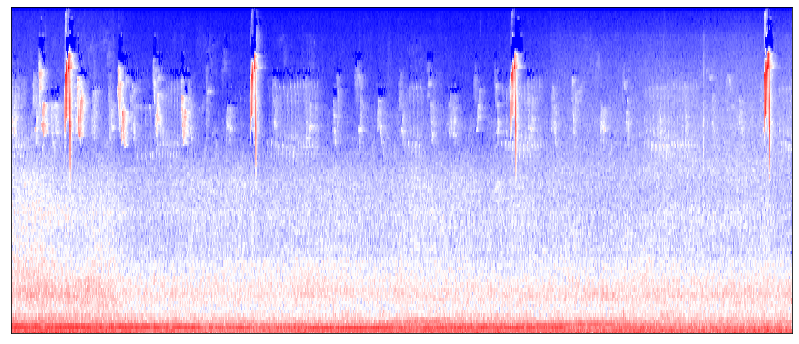

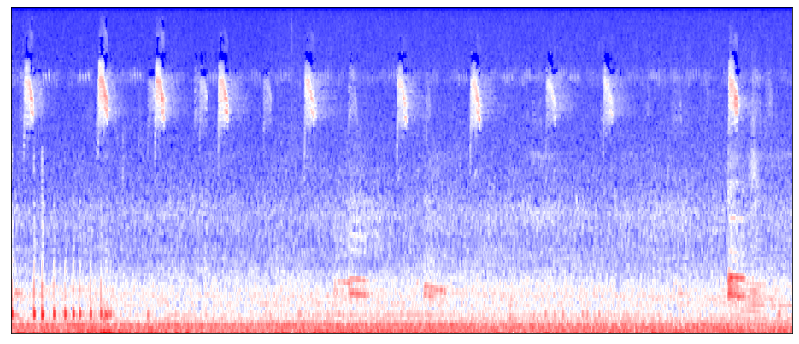

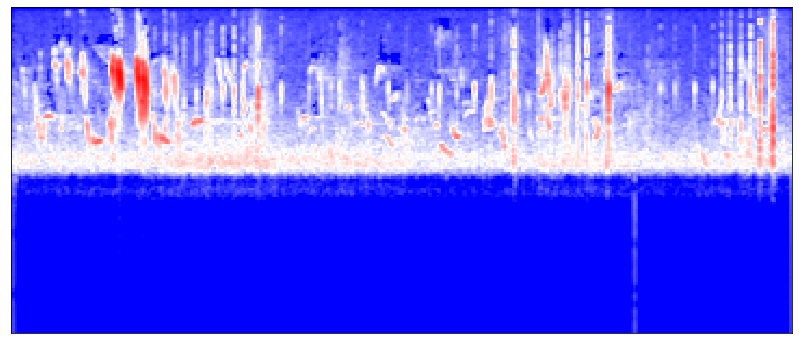

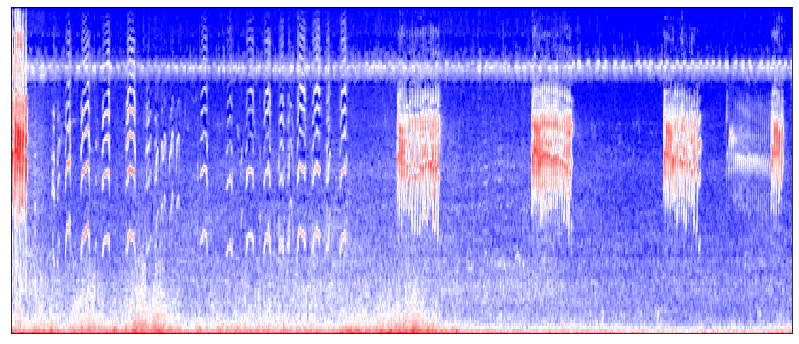

In [37]:
for file in glob.glob("audio/*"):
    id = file.split('\\')[1].split('.')[0]
    mel_spectograms(file, id)
    print(id)

In [2]:
for file in glob.glob("pca_img/*"):
    print(file)

pca_img\107448.png
pca_img\107452.png
pca_img\107461.png
pca_img\107462.png
pca_img\107464.png
pca_img\107465.png
pca_img\107466.png
pca_img\107467.png
pca_img\107469.png
pca_img\107471.png
pca_img\11461.png
pca_img\11468.png
pca_img\11469.png
pca_img\11472.png
pca_img\11473.png
pca_img\11474.png
pca_img\11479.png
pca_img\11481.png
pca_img\11482.png
pca_img\11483.png
pca_img\11484.png
pca_img\11485.png
pca_img\11494.png
pca_img\11495.png
pca_img\11496.png
pca_img\11497.png
pca_img\11499.png
pca_img\11500.png
pca_img\11501.png
pca_img\11504.png
pca_img\11505.png
pca_img\11506.png
pca_img\11831.png
pca_img\11836.png
pca_img\11837.png
pca_img\11841.png
pca_img\11842.png
pca_img\11847.png
pca_img\11848.png
pca_img\11849.png
pca_img\11850.png
pca_img\11851.png
pca_img\11855.png
pca_img\11856.png
pca_img\11857.png
pca_img\11858.png
pca_img\11859.png
pca_img\11860.png
pca_img\11861.png
pca_img\141687.png
pca_img\142580.png
pca_img\142584.png
pca_img\142587.png
pca_img\142590.png
pca_img\14259

(432, 1008, 4)


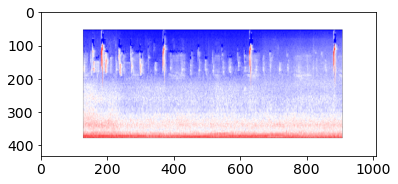

In [56]:
# Import image
img = mplib.imread('pca_img/107448.png')
print(img.shape)
plt.imshow(img)

In [61]:
img

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

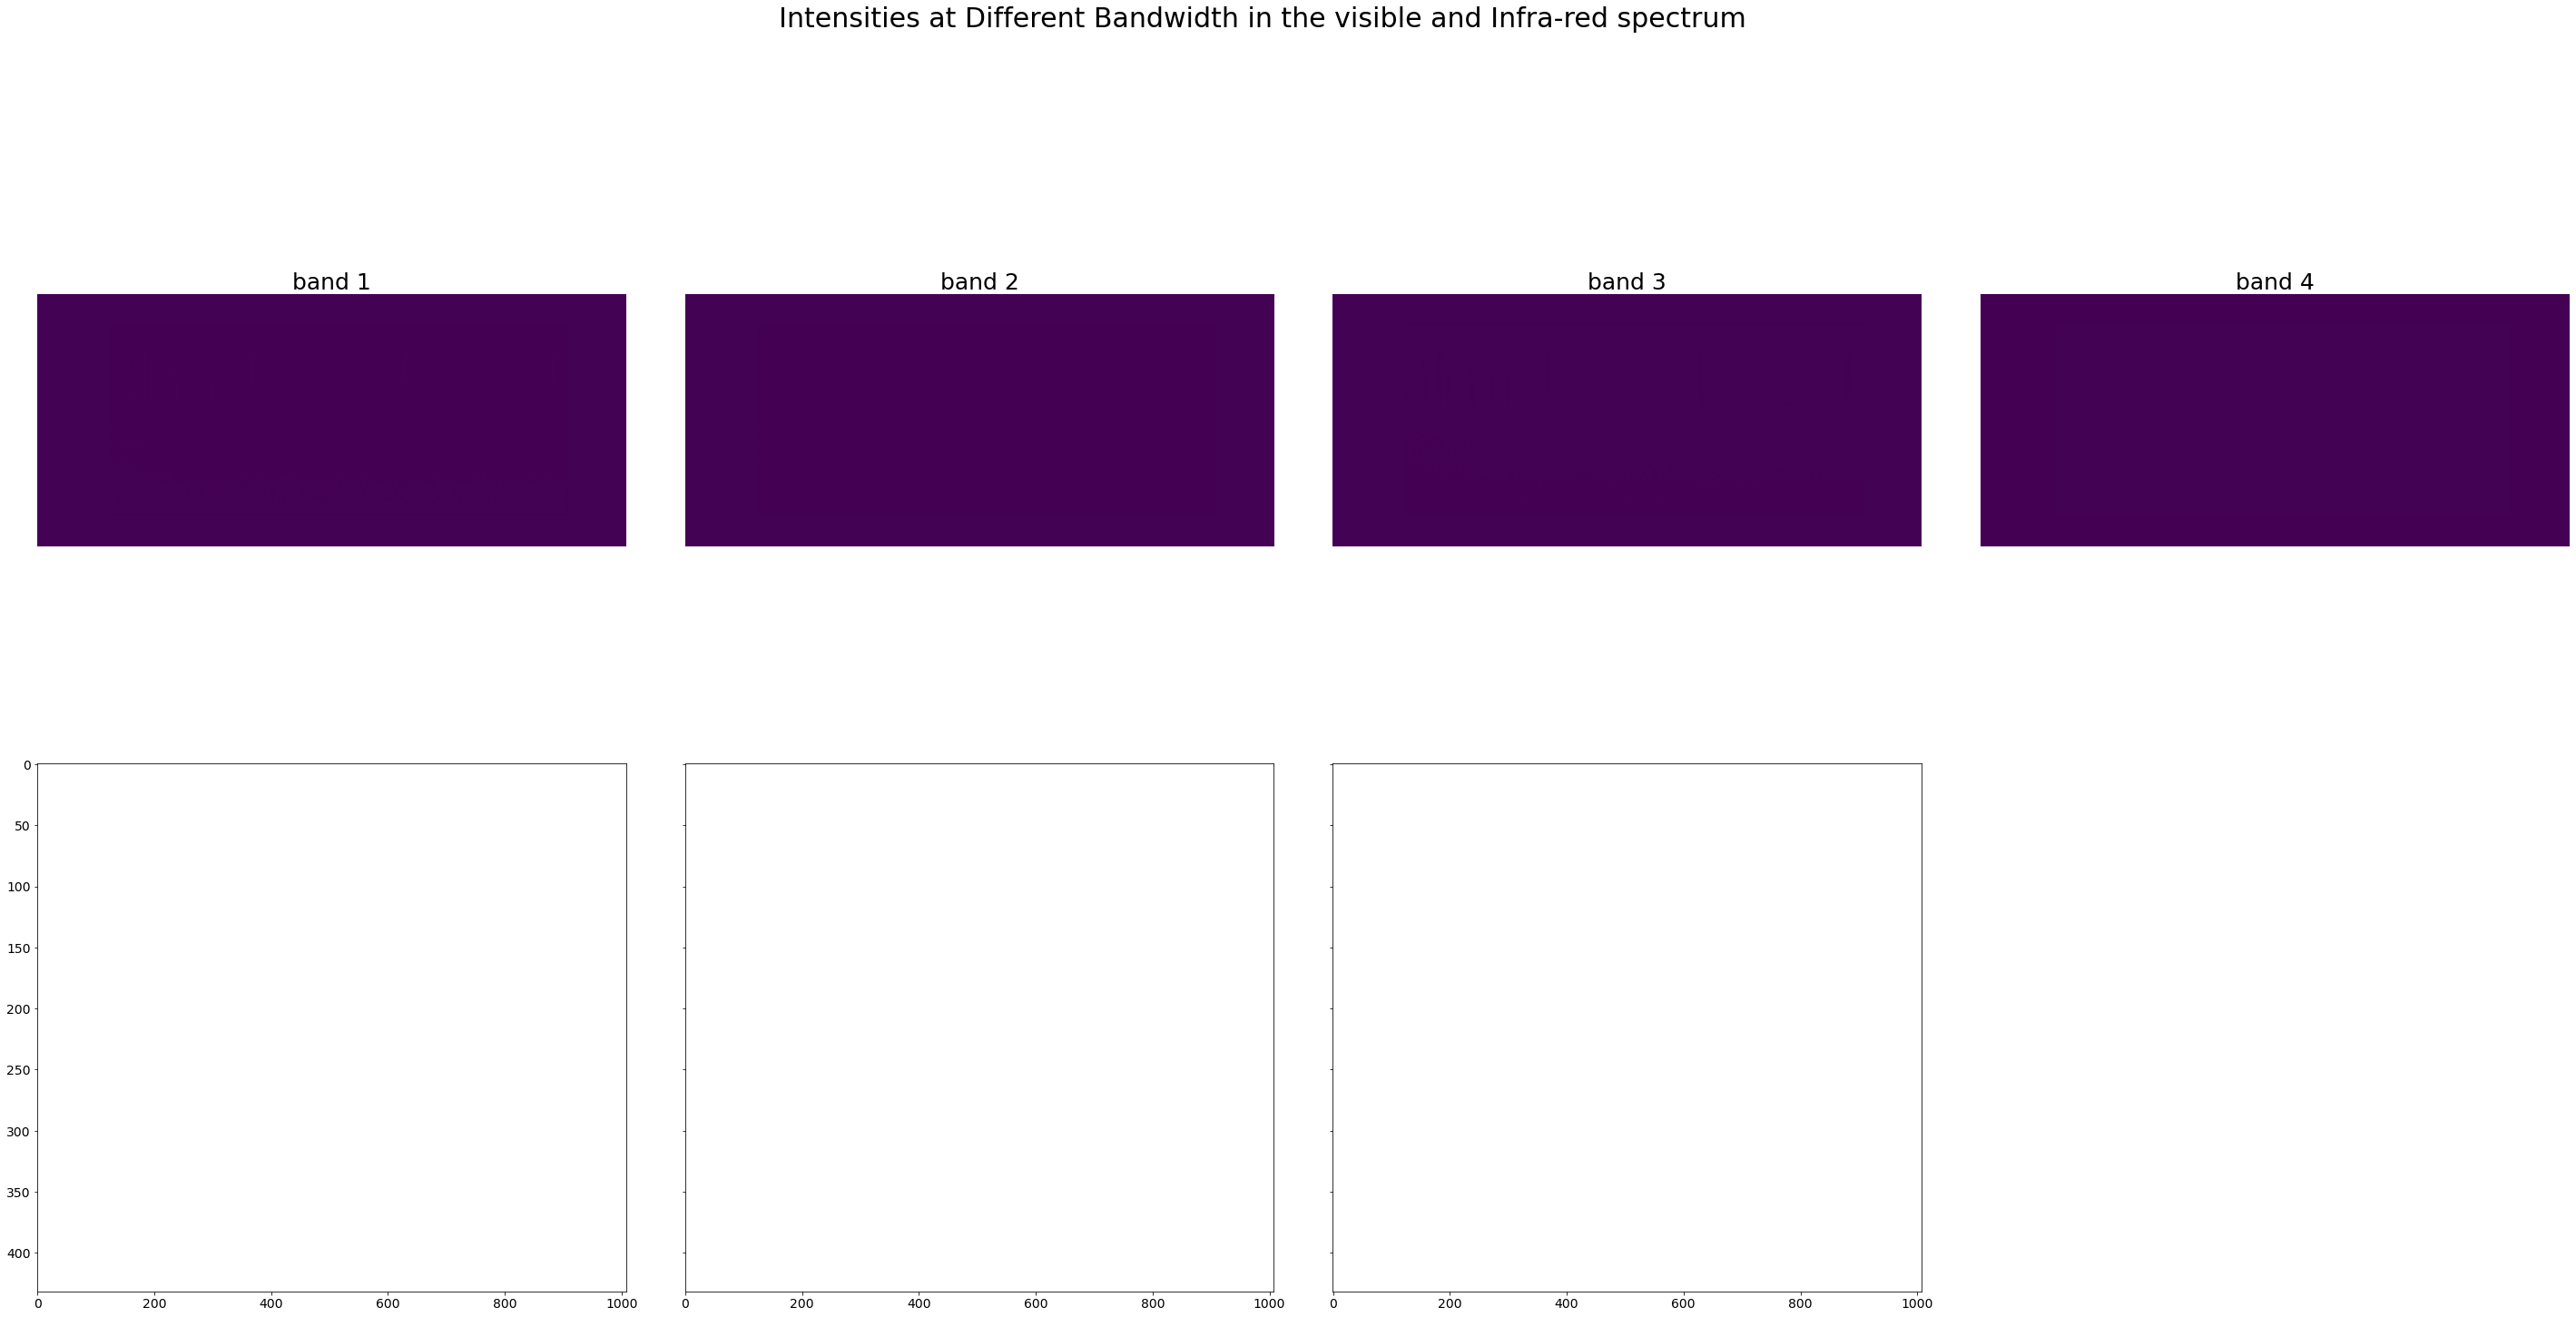

In [66]:
import matplotlib.gridspec as grid

fig,axes = plt.subplots(2,4,figsize=(50,23),sharex='all', sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities at Different Bandwidth in the visible and Infra-red spectrum', fontsize=30)
axes = axes.ravel()

for i in range(n_bands):
    axes[i].imshow(img[:,:,i], vmin=0, vmax=255)
    axes[i].set_title('band '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

In [45]:
# Reshaping the image to 2-dimensional so we are multiplying columns with depth so 225 X 3 = 675.
img_r = np.reshape(img, (224, 7776)) 
print(img_r.shape) 

(224, 7776)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 32)
0.9758669
(224, 7776)


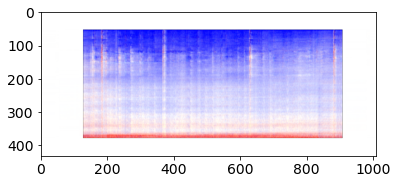

In [55]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

# Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (432,1008 ,4)) 
# print(temp.shape) 
plt.imshow(temp)